# Nachbargitter in drei Dimensionen
Die Nachbargitter, mit denen wir in diesem Kapitel gearbeitet haben, funktionieren im Allgemeinen auch in drei Dimensionen. Es ist nur schwieriger, diese zu visualisieren.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

Die hier verwendeten Bilddaten zeigen einen Ausschnitt eines sich entwickelnden Tribolium castaneum Embryos, der mittels Lichtscheibenmikroskopie von Daniela Vorkel, Myers Labor, MPI-CBG / CSBD Dresden, aufgenommen wurde.

In [2]:
raw_image = imread("../../data/Lund_000500_resampled-cropped.tif")

raw_image.shape

(100, 256, 256)

Der Einfachheit halber schreiben wir eine kurze Funktion zur Visualisierung unseres Bildstapels in drei Maximalprojektionen aus verschiedenen Perspektiven.

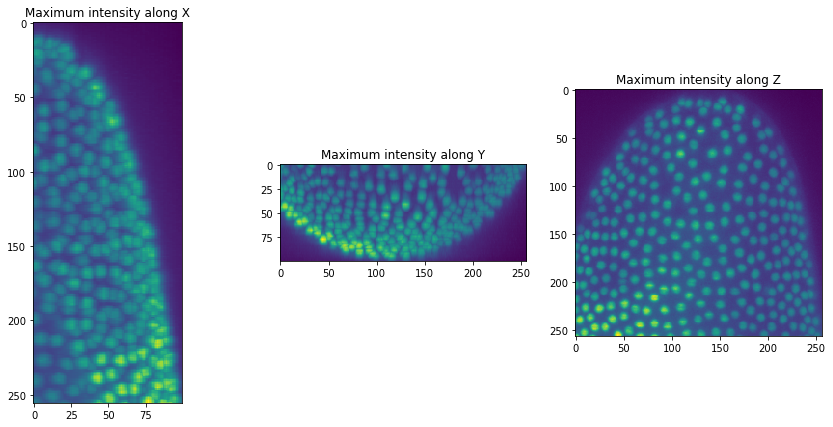

In [3]:
def orthogonal_show(image, labels=False):

    fig, axs = plt.subplots(1, 3, figsize=(15, 7))

    cle.imshow(cle.maximum_x_projection(image), plot=axs[0], labels=labels)
    cle.imshow(cle.maximum_y_projection(image), plot=axs[1], labels=labels)
    cle.imshow(cle.maximum_z_projection(image), plot=axs[2], labels=labels)
    
    axs[0].set_title("Maximale Intensität entlang X")
    axs[1].set_title("Maximale Intensität entlang Y")
    axs[2].set_title("Maximale Intensität entlang Z")

orthogonal_show(raw_image)

Wir können nun Zellkerne in unserem Datensatz segmentieren.

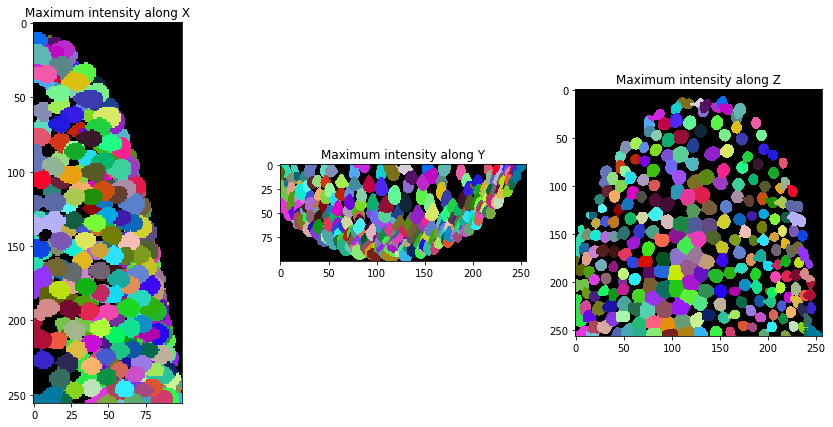

In [4]:
background_subtracted = cle.top_hat_box(raw_image, radius_x=5, radius_y=5, radius_z=5)

nuclei = cle.voronoi_otsu_labeling(background_subtracted)

orthogonal_show(nuclei, labels=True)

Nach der Segmentierung erweitern wir die Beschriftungen ein wenig, damit sie sich berühren.

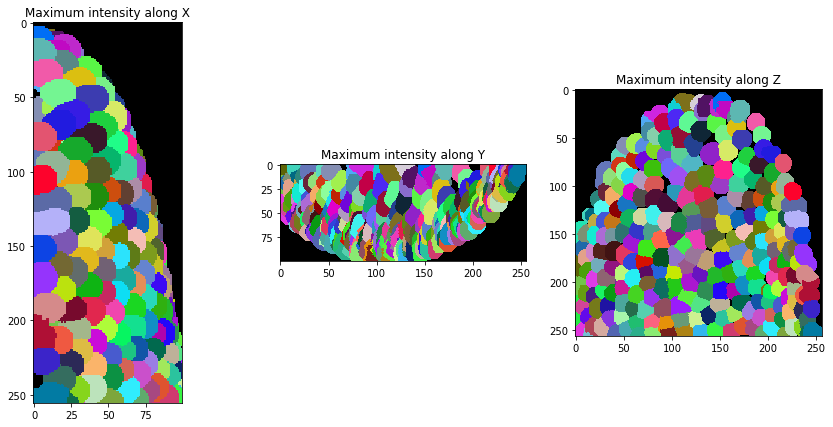

In [5]:
expanded_nuclei = cle.dilate_labels(nuclei, radius=4)

orthogonal_show(expanded_nuclei, labels=True)

Und dann können wir ein (Schwerpunkt-)Distanznetz zwischen sich berührenden Nachbarn visualisieren.

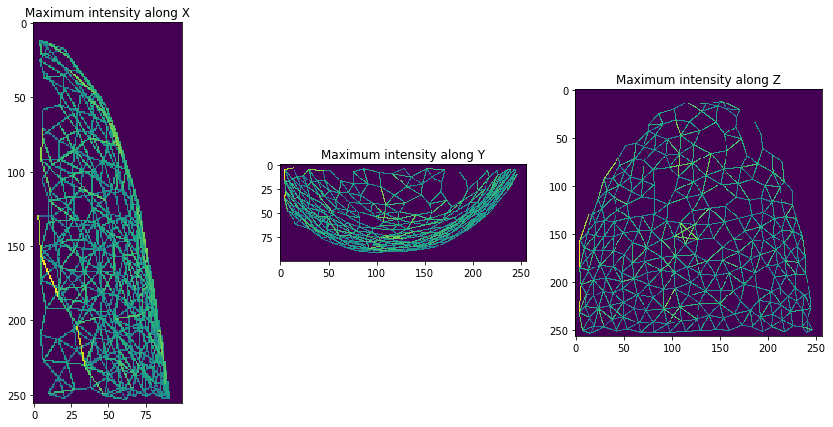

In [6]:
mesh = cle.draw_distance_mesh_between_touching_labels(expanded_nuclei)

orthogonal_show(mesh)